In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm

In [15]:
seismic = pd.read_csv("seismic_data.csv")

In [16]:
seismic.head()

,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2024-09-24 14:24:24,-25.93,-71.15,50,5.3
1,2024-09-23 02:36:38,-29.73,-71.19,65,5.5
2,2024-09-22 18:46:38,-32.04,-71.46,60,5.2
3,2024-09-06 10:12:56,-28.69,-69.56,128,5.7
4,2024-09-05 10:38:28,-19.13,-67.65,245,5.5


In [17]:
# Convert 'Date' column to datetime objects
seismic['Date(UTC)'] = pd.to_datetime(seismic['Date(UTC)'])

# Extract year, month, day, and time
seismic['Year'] = seismic['Date(UTC)'].dt.year
seismic['Month'] = seismic['Date(UTC)'].dt.month
seismic['Day'] = seismic['Date(UTC)'].dt.day
seismic['Time'] = seismic['Date(UTC)'].dt.time


In [18]:
seismic.head()

,Date(UTC),Latitude,Longitude,Depth,Magnitude,Year,Month,Day,Time
0,2024-09-24 14:24:24,-25.93,-71.15,50,5.3,2024,9,24,14:24:24
1,2024-09-23 02:36:38,-29.73,-71.19,65,5.5,2024,9,23,02:36:38
2,2024-09-22 18:46:38,-32.04,-71.46,60,5.2,2024,9,22,18:46:38
3,2024-09-06 10:12:56,-28.69,-69.56,128,5.7,2024,9,6,10:12:56
4,2024-09-05 10:38:28,-19.13,-67.65,245,5.5,2024,9,5,10:38:28


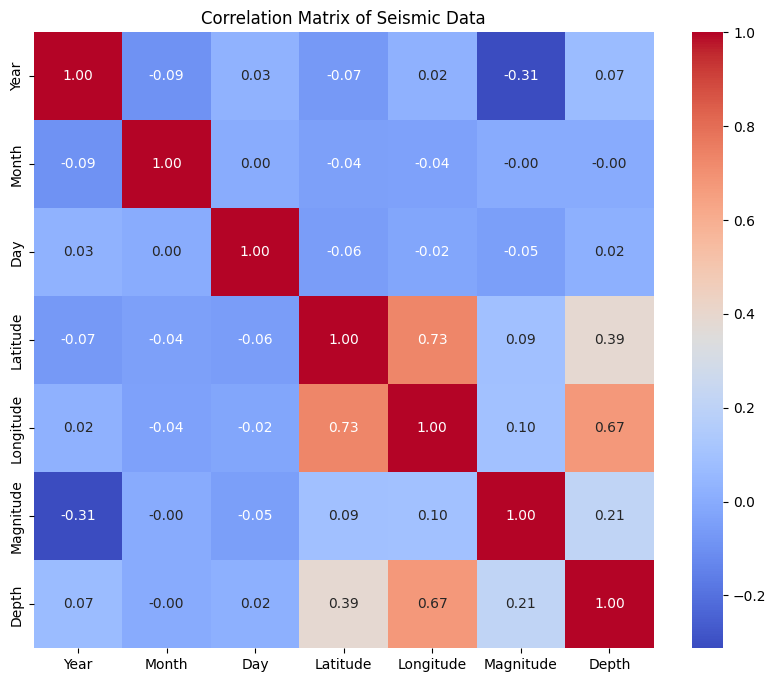

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns for correlation analysis
cols_for_corr = ['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Magnitude', 'Depth']

# Calculate the correlation matrix
correlation_matrix = seismic[cols_for_corr].corr()

# Create the correlation matrix heatmap using pyplot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Seismic Data')
plt.show()

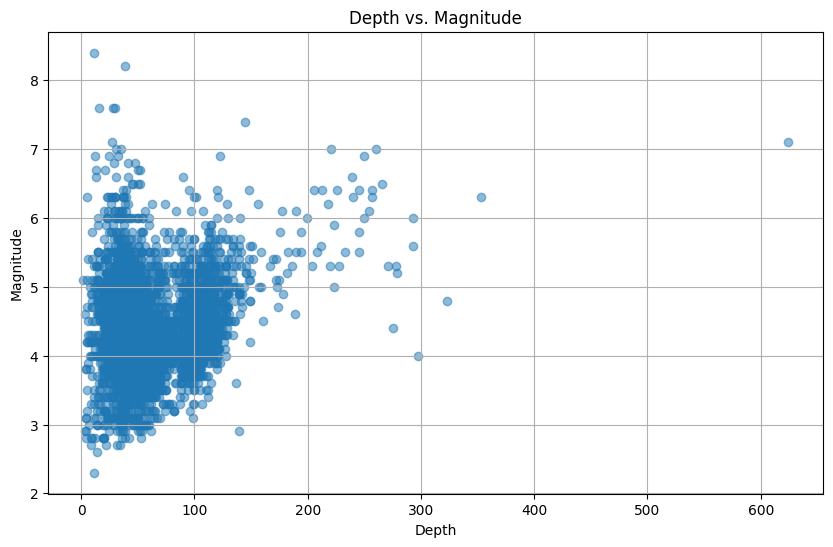

In [20]:
# Create the 2D graph between depth and magnitude
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(seismic['Depth'], seismic['Magnitude'], alpha=0.5)
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Depth vs. Magnitude')
plt.grid(True)
plt.show()

In [21]:
# Drop the 5 highest depths
seismic = seismic.sort_values('Depth', ascending=False)
seismic = seismic.iloc[5:]

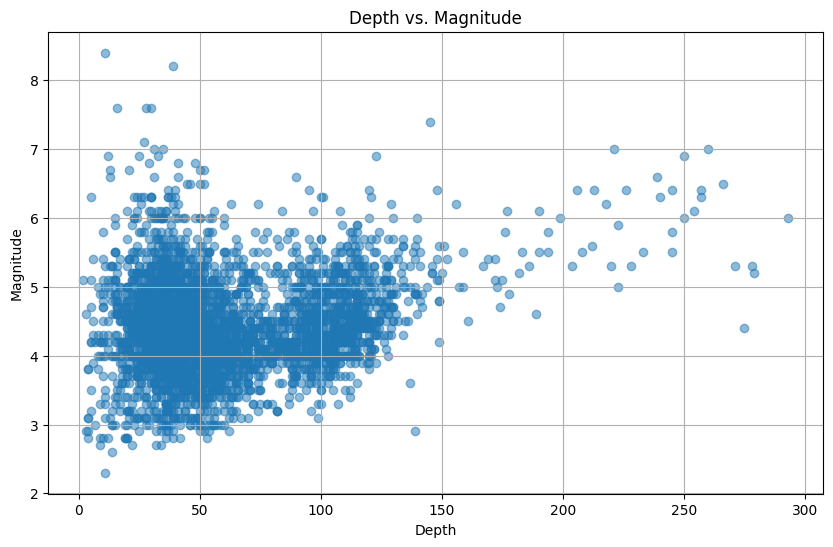

In [22]:
# Create the 2D graph between depth and magnitude
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(seismic['Depth'], seismic['Magnitude'], alpha=0.5)
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Depth vs. Magnitude')
plt.grid(True)
plt.show()

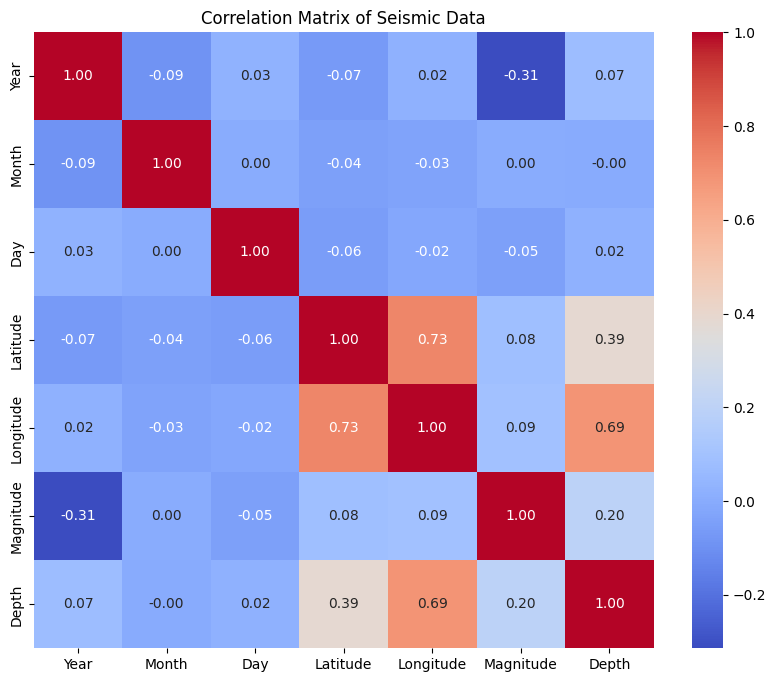

In [23]:
# Select the columns for correlation analysis
cols_for_corr = ['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Magnitude', 'Depth']

# Calculate the correlation matrix
correlation_matrix = seismic[cols_for_corr].corr()

# Create the correlation matrix heatmap using pyplot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Seismic Data')
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score

# Define features (X) and target (y)
X = seismic[['Magnitude', 'Longitude', 'Latitude']]  # Use 'Depth' as the feature
y = seismic['Depth'] # Use 'Magnitude' as the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

# Train the model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Cross-validation scores: [ 0.61529623  0.55128094  0.56549071  0.64361837  0.58602717  0.53928145
  0.65446618 -0.08774839  0.58954811  0.58152635]
Average cross-validation score: 0.523878711723235


In [26]:
  # Perform cross-validation (10 folds) and get the trained models from each fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)  # 10-fold cross-validation

models = []
for train_index, _ in kf.split(X_train):
    X_fold_train, _ = X_train.iloc[train_index], y_train.iloc[train_index]  # y_train is not needed for the next step.
    model_instance = LinearRegression()
    model_instance.fit(X_fold_train, y_train.iloc[train_index]) # train using full y_train
    models.append(model_instance)

# Grab the 4th model from cross-validation
fourth_model = models[4]

# Create a new data point for prediction (replace with your actual data)
new_data_point = pd.DataFrame({'Magnitude': [6.0], 'Longitude': [-66.20], 'Latitude': [-22.43]})

# Use the 4th model to predict the new data point
prediction = fourth_model.predict(new_data_point)

# Print the prediction
print("Prediction for the new data point:", prediction)

Prediction for the new data point: [182.17349655]


In [27]:
new_preds = fourth_model.predict(X_test)

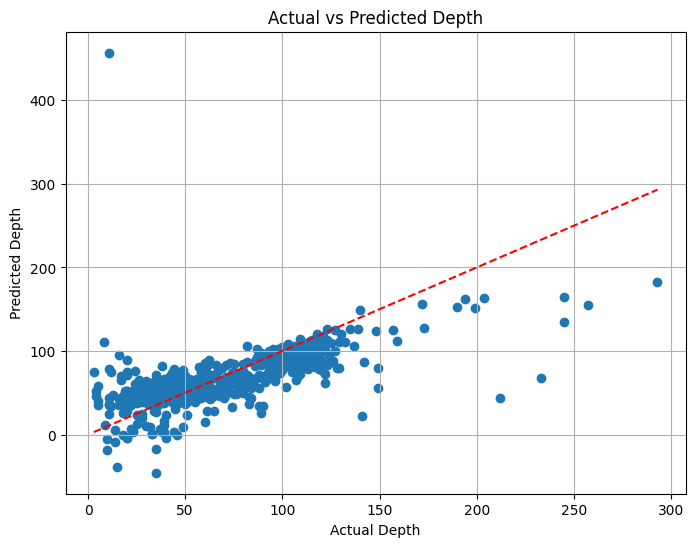

In [28]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

plt.figure(figsize=(8, 6))
plt.scatter(y_test, new_preds)  # Create a scatter plot
plt.xlabel("Actual Depth")
plt.ylabel("Predicted Depth")
plt.title("Actual vs Predicted Depth")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.grid(True)
plt.show()

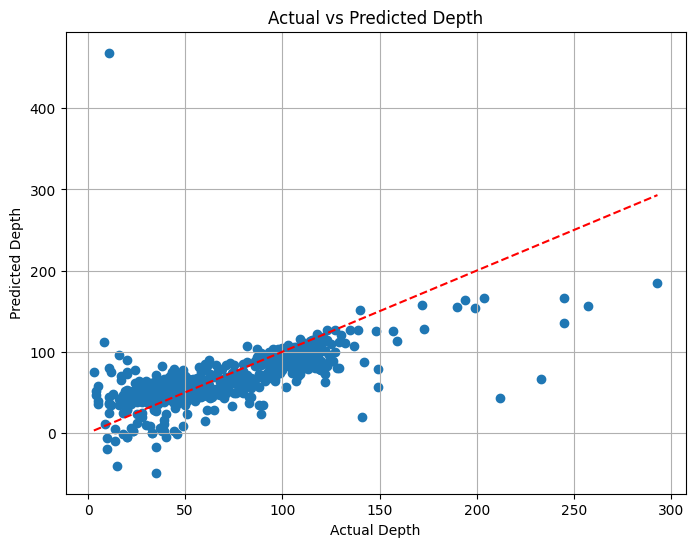

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)  # Create a scatter plot
plt.xlabel("Actual Depth")
plt.ylabel("Predicted Depth")
plt.title("Actual vs Predicted Depth")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.grid(True)
plt.show()

In [ ]:
# Create a new data point for prediction
new_data_point = pd.DataFrame({ 'Magnitude': [5.1], 'Longitude': [-72.2], 'Latitude': [-22.43]})

# Make a prediction using the trained model
new_prediction = model.predict(new_data_point)

print(f"Predicted Depth for the new data point: {new_prediction[0]}")

Predicted Depth for the new data point: 18.105516959396937


In [ ]:
import joblib

# Save the fourth model to a file
joblib.dump(fourth_model, 'fourth_model.pkl')

# Load the saved model
loaded_fourth_model = joblib.load('fourth_model.pkl')

# Now you can use the loaded_fourth_model independently
new_data_point = pd.DataFrame({'Magnitude': [6.0], 'Longitude': [-66.20], 'Latitude': [-22.43]})
prediction = loaded_fourth_model.predict(new_data_point)
print("Prediction using the loaded fourth model:", prediction)

Prediction using the loaded fourth model: [182.17349655]
